# CNN - basic

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(1, 3, 3, 1)


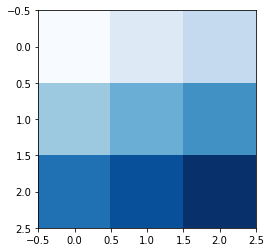

In [14]:
sess = tf.InteractiveSession() # 그냥 session 과 다르게 default 로 이 세션 선언
# eval 값에 (sess=sess) 기입하지 않아도 됨.
image = np.arange(1,10, dtype=np.float32).reshape(1,3,3,1)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap="Blues")
# 1이 포함된 형태의 reshape 을 하면 1을 없애줌.

- image  = (image_num, size, size, color)
- filter = (size, size, color, filter_num)
- strides = (1, move. move, 1)
- padding ->
    - "VALID" = > 가능한 만큼의 수만 반환
    - "SAME"  = > 입력한 image size 만큼 반환
- convolution_image = (image_num, size, size, filter_num)

### 1 filter(2,2,1,1)

[[[[18.]
   [23.]]

  [[33.]
   [38.]]]] (1, 2, 2, 1)
[[[[18.]
   [23.]]

  [[33.]
   [38.]]]]


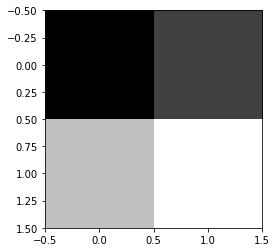

In [85]:
weight = tf.constant([[[[1.]],[[1.]]],[[[0.]],[[3.]]]])
# weight = tf.constant(tf.ones((2,2,1,1)))
# weigh의 shape 가 filter의 shape 와 num 을 결정
# 안의 내용물이 각각의 weight 이 됨

conv2d = tf.nn.conv2d(image , weight, strides = [1,1,1,1], # 각각에 더할 값들
                     padding="VALID") # filter 를 통과하여 알아서 계산
#padding ="same " > 출력값 또한 필터, 스트라이드와 상관없이 
# convolutino 의 사이즈가원래 이미지의 크기와 같게 해주겠다.
# 가장자리에 0으로 채워진 아이를 씌움

conv2d_img = conv2d.eval()
print(conv2d_img, conv2d.shape)

con2d_img = np.swapaxes(conv2d_img,0,3)
print(con2d_img)
for i, one_img in enumerate(conv2d_img):
    plt.imshow(one_img.reshape(2,2), cmap="gray")

### 3 filters(2,2,1,3)

weight.shape (2, 2, 1, 3)
conv2d_img
 [[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]] (1, 3, 3, 3)


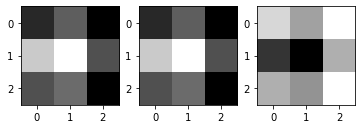

In [83]:
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                     [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding="SAME")
conv2d_img = conv2d.eval()
print("conv2d_img\n", conv2d_img, conv2d_img.shape)
conv2d = np.swapaxes(conv2d_img,0,3) # filter 개수에 따라 image 를 출력하기 위해서
for i, one_img in enumerate(conv2d): # filter 에 따른 그래프를 출력
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap="gray")
# 가로로 한줄, 세로로 3줄
# 몇번째 칸에 그릴지 결정. 1, 2, 3
#                          4, 5, 6

# numpy 의 경우 하나의 dtype만 받을 수 있기 때문에
# numpy array 끼리 연산할 때 반드시 dtype 이 같아야함!

### Max Pooling - overfitting 방지

In [88]:
image = np.array([[[[4.],[3.]],[[2.],[1.]]]], dtype=np.float32)

pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1],
                     padding = "SAME")
print(image.shape)
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## CNN for MNIST

#### load data & module

In [89]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


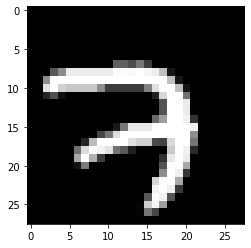

In [91]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap="gray")

Tensor("Conv2D_40:0", shape=(1, 14, 14, 5), dtype=float32)


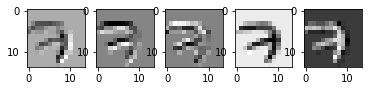

Tensor("MaxPool_7:0", shape=(1, 7, 7, 5), dtype=float32)


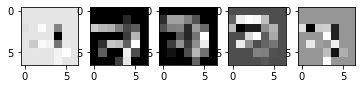

In [98]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
w1 = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01 ))
# 난수 생성시, 분산을 0.01로 지정 => 너무 초깃값에 영향을 받지 않도록
conv2d = tf.nn.conv2d(img,w1, strides=[1,2,2,1], padding = "SAME")
# SAME 은 strides 가 1일 때 기준으로 input 과 output의 크기를 같게

print(conv2d)
sess.run(tf.global_variables_initializer()) # 변수 작동 전에 초기화
conv2d_img = np.swapaxes(conv2d.eval(),0,3)
for idx, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,idx+1), plt.imshow(one_img.reshape(14,14), cmap="gray")
plt.show()

pool= tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = np.swapaxes(pool.eval(), 0, 3)
for idx, one_img in enumerate(pool_img):
    plt.subplot(1,5,idx+1), plt.imshow(one_img.reshape(7,7), cmap="gray")